# Loan Application Status Prediction

Problem Statement:

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

Dependent Variable (Target Variable):

- Loan_Status

You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

About Project: This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. We have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sts

In [2]:
# Importing Dataset

ds= pd.read_csv("loan_prediction.csv")
ds.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df= pd.DataFrame(data= ds)
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(614, 13)

In [5]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [8]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Observations: Count number is less for LoanAmount and Credit_History, so there is missing values present. For ApplicantIncome and CoapplicantIncome	 there is high difference in min and max value. 

In [9]:
#Checking for Null values

df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Observations: There is missing values are present in most of columns such as Gender, Married, Dependents etc.

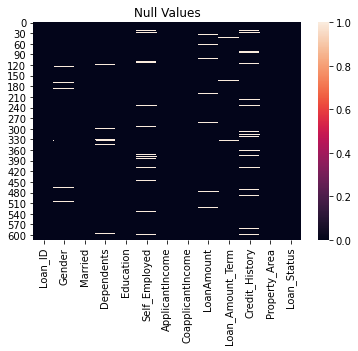

In [10]:
sns.heatmap(df.isnull())
plt.title('Null Values')
plt.show()

Observations: There is missing values are present in most of columns such as Gender, Married, Dependents etc.

In [11]:
#Dealing with missing values

df['Gender'].mode()

0    Male
dtype: object

In [12]:
df['Gender'].fillna('Male', inplace=True)
df['Gender'].isnull().sum()

0

In [13]:
df['Married'].mode()

0    Yes
dtype: object

In [14]:
df['Married'].fillna('Yes', inplace=True)
df['Gender'].isnull().sum()

0

In [15]:
df['Dependents'].mode()

0    0
dtype: object

In [16]:
df['Dependents'].fillna('0', inplace=True)
df['Dependents'].isnull().sum()

0

In [17]:
df['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [18]:
#Removing + sign and need to convert int data type

df['Dependents']= df['Dependents'].str[0:1]
df['Dependents'].unique()

array(['0', '1', '2', '3'], dtype=object)

In [19]:
df['Dependents']= df['Dependents'].astype('int')

In [20]:
df['Dependents'].unique()

array([0, 1, 2, 3])

In [21]:
df['Self_Employed'].mode()

0    No
dtype: object

In [22]:
df['Self_Employed'].fillna('No', inplace=True)
df['Self_Employed'].isnull().sum()

0

In [23]:
df['Self_Employed'].unique()

array(['No', 'Yes'], dtype=object)

In [24]:
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
df['LoanAmount'].isnull().sum()

0

In [25]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(), inplace=True)
df['Loan_Amount_Term'].isnull().sum()

0

In [26]:
df['Credit_History'].unique()

array([ 1.,  0., nan])

In [27]:
df['Credit_History'].max()

1.0

In [28]:
df['Credit_History'].fillna(df['Credit_History'].max(), inplace=True)
df['Credit_History'].isnull().sum()

0

In [29]:
df['Credit_History'].unique()

array([1., 0.])

In [30]:
df['Credit_History']= df['Credit_History'].astype('int')
df['Credit_History'].unique()

array([1, 0])

In [31]:
df['Loan_Amount_Term']= df['Loan_Amount_Term'].astype('int')
df['Credit_History'].dtypes

dtype('int32')

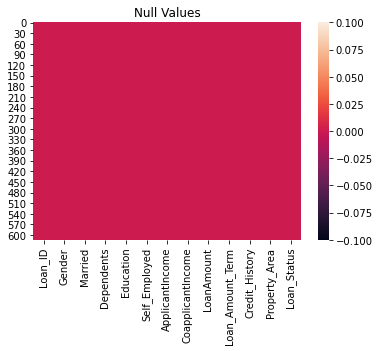

In [32]:
sns.heatmap(df.isnull())
plt.title('Null Values')
plt.show()

Observations: Now no null values are present in dataset.

In [33]:
# Dropping Loan_ID column 
df= df.drop('Loan_ID', axis=1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360,1,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360,1,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360,1,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360,1,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360,1,Urban,Y


# EDA

In [34]:
#Getting Unique Values for Object data type columns

for i in df.columns:
    if df[i].dtypes== 'object':
        print(str(i), ' : ', df[i].unique())
        print(df[i].value_counts())
        print()
        print()

Gender  :  ['Male' 'Female']
Male      502
Female    112
Name: Gender, dtype: int64


Married  :  ['No' 'Yes']
Yes    401
No     213
Name: Married, dtype: int64


Education  :  ['Graduate' 'Not Graduate']
Graduate        480
Not Graduate    134
Name: Education, dtype: int64


Self_Employed  :  ['No' 'Yes']
No     532
Yes     82
Name: Self_Employed, dtype: int64


Property_Area  :  ['Urban' 'Rural' 'Semiurban']
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


Loan_Status  :  ['Y' 'N']
Y    422
N    192
Name: Loan_Status, dtype: int64




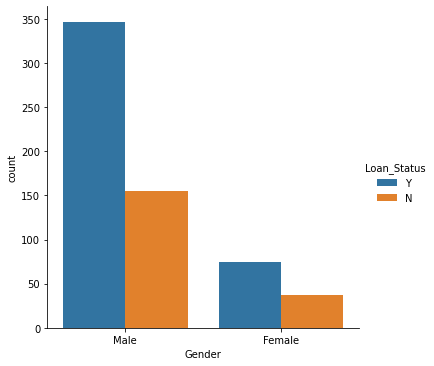

In [35]:
sns.catplot(x ="Gender", hue ="Loan_Status", kind ="count", data = df)

Observations: We can see that there is more male loan aplicants where rate of loan aproval is high.

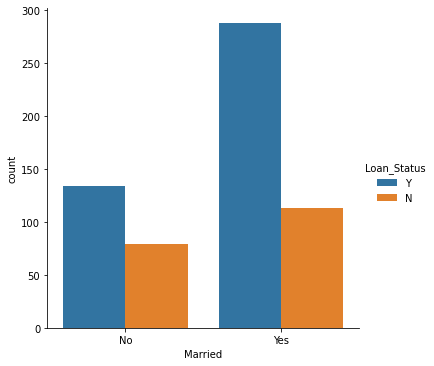

In [36]:
sns.catplot(x ="Married", hue ="Loan_Status", kind ="count", data = df)

Observations: We can see that there is more Married loan aplicants where rate of loan aproval is high.

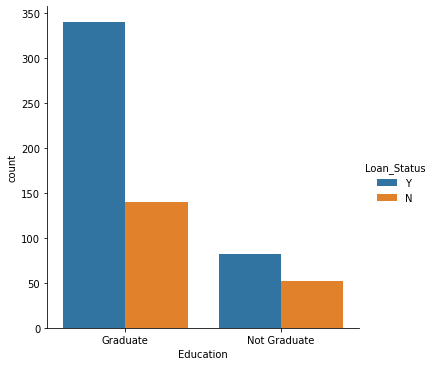

In [37]:
sns.catplot(x ="Education", hue ="Loan_Status", kind ="count", data = df)

Observations: We can see that there is more Graduate loan aplicants where rate of loan aproval is high.

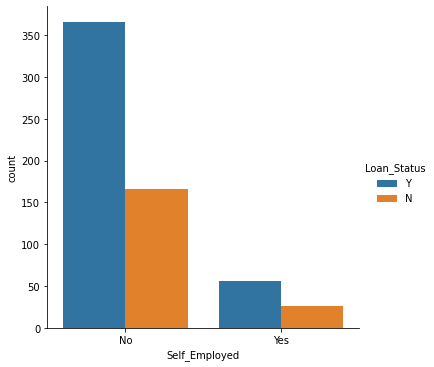

In [38]:
sns.catplot(x ="Self_Employed", hue ="Loan_Status", kind ="count", data = df)

Observations: We can see that there is more loan aplicants whose are not self_employed where rate of loan aproval is high.

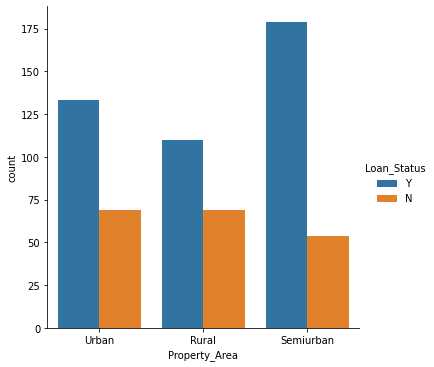

In [39]:
sns.catplot(x ="Property_Area", hue ="Loan_Status", kind ="count", data = df)

Observations: We can see that there is more loan aplicants whose belongs to Semiurban where rate of loan aproval is high.

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Loan_Status'>

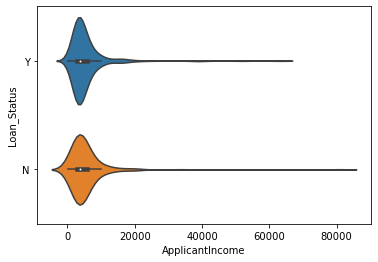

In [40]:
sns.violinplot(x= 'ApplicantIncome', y= 'Loan_Status', data= df)

Observations: AplicantIncome is distributed maximum  is upto 20000. 

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Loan_Status'>

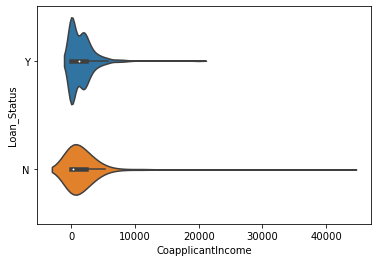

In [41]:
sns.violinplot(x= 'CoapplicantIncome', y= 'Loan_Status', data= df)

Observations: CoaplicantIncome is distributed maximum is upto 10000.

C:\Users\Iyappa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

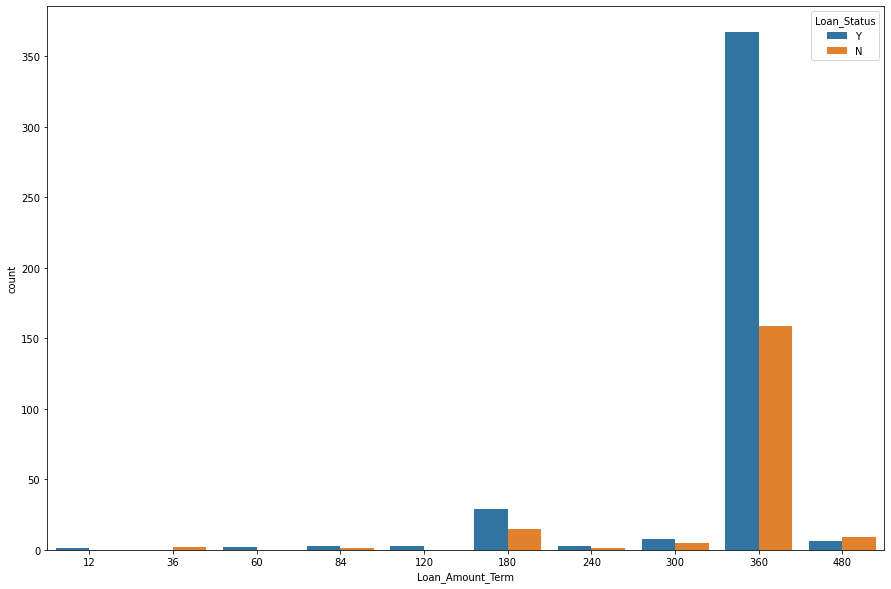

In [42]:
plt.subplots(figsize=(15,10))
sns.countplot('Loan_Amount_Term', hue= 'Loan_Status', data= df)

Observations: There is maximum applicants with 360 Loan_Amount_Term with maximum rate of loan getting aproved.

C:\Users\Iyappa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Credit_History', ylabel='count'>

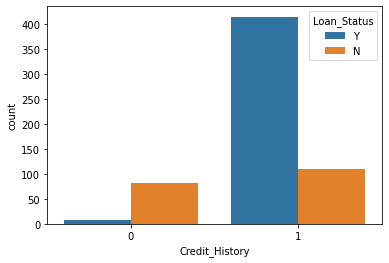

In [43]:
sns.countplot('Credit_History', hue= 'Loan_Status', data= df)

Observations: There is maximum applicants whose credit_History is 1 where maximum rate of loan getting aproved. And aplicants belongs to credit_History 0, having high possibility of loan not getting aproval.

In [44]:
#Label Encoding
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0,0.0,0.0,5849,0.0,128.0,360,1,2.0,1.0
1,1.0,1.0,1,0.0,0.0,4583,1508.0,128.0,360,1,0.0,0.0
2,1.0,1.0,0,0.0,1.0,3000,0.0,66.0,360,1,2.0,1.0
3,1.0,1.0,0,1.0,0.0,2583,2358.0,120.0,360,1,2.0,1.0
4,1.0,0.0,0,0.0,0.0,6000,0.0,141.0,360,1,2.0,1.0


<AxesSubplot:>

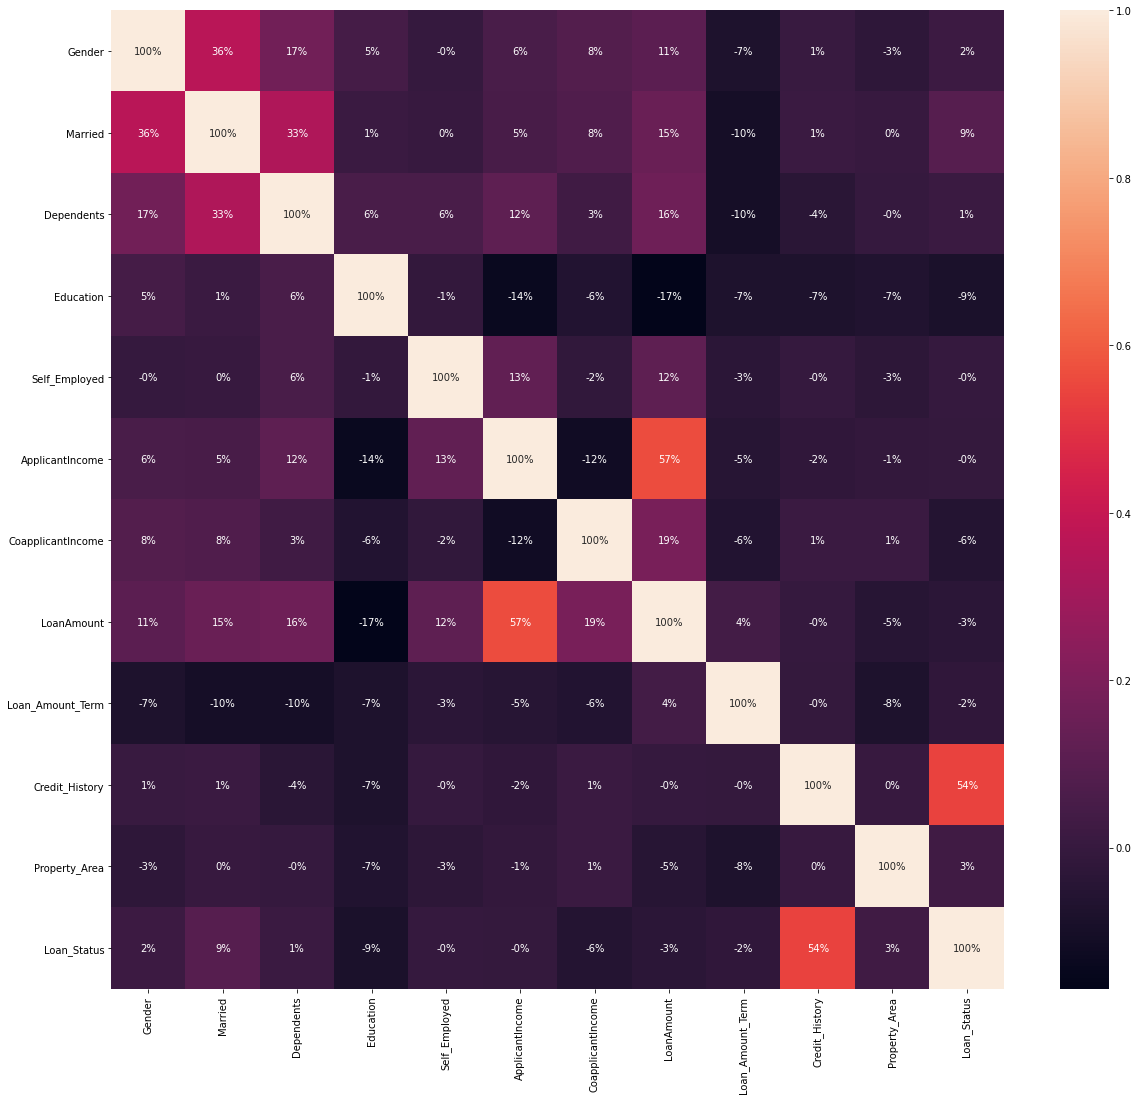

In [45]:
plt.figure(figsize=(20,18))
sns.heatmap(df.corr(), annot= True, fmt= '.0%')

Observations: Loan_Status is highly correlated to Credit_History. Where as loan amount is highly correlated to Applicant Income.

Gender                   AxesSubplot(0.125,0.71587;0.0824468x0.16413)
Married               AxesSubplot(0.223936,0.71587;0.0824468x0.16413)
Dependents            AxesSubplot(0.322872,0.71587;0.0824468x0.16413)
Education             AxesSubplot(0.421809,0.71587;0.0824468x0.16413)
Self_Employed         AxesSubplot(0.520745,0.71587;0.0824468x0.16413)
ApplicantIncome       AxesSubplot(0.619681,0.71587;0.0824468x0.16413)
CoapplicantIncome     AxesSubplot(0.718617,0.71587;0.0824468x0.16413)
LoanAmount            AxesSubplot(0.817553,0.71587;0.0824468x0.16413)
Loan_Amount_Term        AxesSubplot(0.125,0.518913;0.0824468x0.16413)
Credit_History       AxesSubplot(0.223936,0.518913;0.0824468x0.16413)
Property_Area        AxesSubplot(0.322872,0.518913;0.0824468x0.16413)
Loan_Status          AxesSubplot(0.421809,0.518913;0.0824468x0.16413)
dtype: object

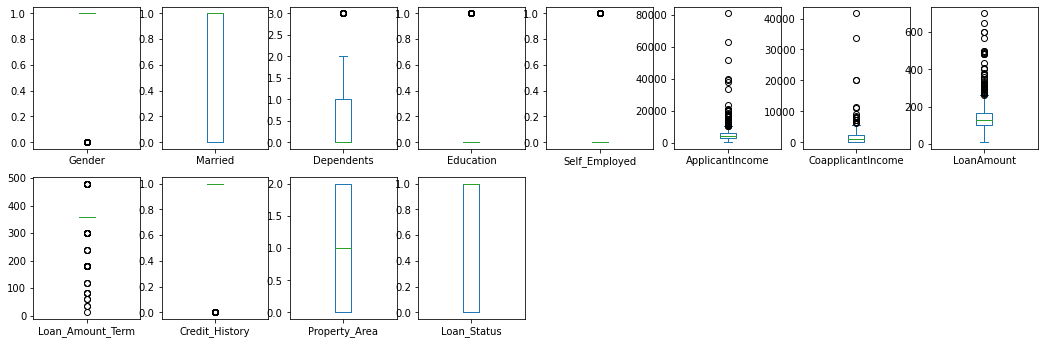

In [46]:
#Checking for the Outliers

df.plot(kind= 'box', subplots= True, layout= (4,8), figsize=(18,12))

Observations: There are columns such as ApplicantIncome, CoapplicantIncome, LoanAmount having maximum no. of outliers.

In [47]:
#Removing the Outliers

from scipy.stats import zscore
z= np.abs(zscore(df))
threshold=3
df_new= df[(z<3).all(axis=1)]
df_new

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0,0.0,0.0,5849,0.0,128.0,360,1,2.0,1.0
1,1.0,1.0,1,0.0,0.0,4583,1508.0,128.0,360,1,0.0,0.0
2,1.0,1.0,0,0.0,1.0,3000,0.0,66.0,360,1,2.0,1.0
3,1.0,1.0,0,1.0,0.0,2583,2358.0,120.0,360,1,2.0,1.0
4,1.0,0.0,0,0.0,0.0,6000,0.0,141.0,360,1,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0,0.0,0.0,2900,0.0,71.0,360,1,0.0,1.0
610,1.0,1.0,3,0.0,0.0,4106,0.0,40.0,180,1,0.0,1.0
611,1.0,1.0,1,0.0,0.0,8072,240.0,253.0,360,1,2.0,1.0
612,1.0,1.0,2,0.0,0.0,7583,0.0,187.0,360,1,2.0,1.0


In [48]:
df.shape

(614, 12)

In [49]:
df_new.shape

(577, 12)

Observations: We can see that there are almost 37 rows removed due to outliers.

In [50]:
#Splitting DATA

x= df.drop('Loan_Status', axis=1)
y= df[['Loan_Status']]
print(x.shape)
print(y.shape)

(614, 11)
(614, 1)


array([[<AxesSubplot:title={'center':'Gender'}>,
        <AxesSubplot:title={'center':'Married'}>,
        <AxesSubplot:title={'center':'Dependents'}>,
        <AxesSubplot:title={'center':'Education'}>,
        <AxesSubplot:title={'center':'Self_Employed'}>,
        <AxesSubplot:title={'center':'ApplicantIncome'}>,
        <AxesSubplot:title={'center':'CoapplicantIncome'}>,
        <AxesSubplot:title={'center':'LoanAmount'}>],
       [<AxesSubplot:title={'center':'Loan_Amount_Term'}>,
        <AxesSubplot:title={'center':'Credit_History'}>,
        <AxesSubplot:title={'center':'Property_Area'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=obje

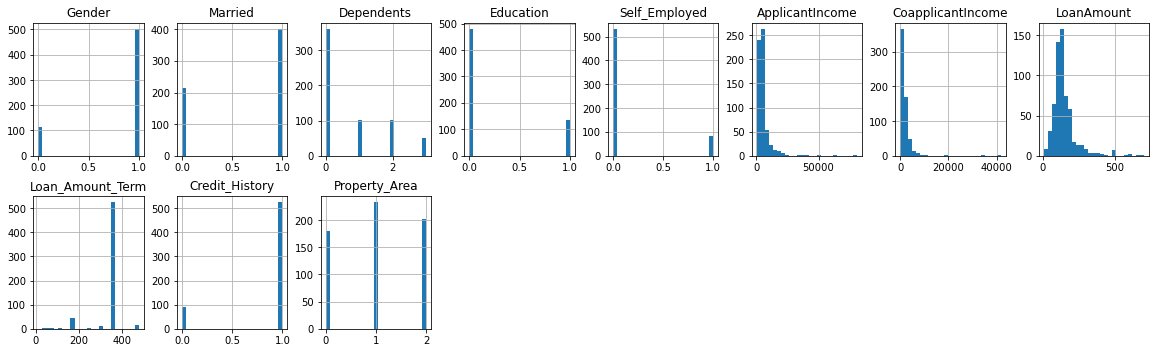

In [51]:
x.hist(figsize=(20,12), layout= (4,8), grid= True, bins=25)

Observations: We can see that some columns such as ApplicantIncome, LoanAmount, CoapplicantIncome having somewhat left skewed.

In [52]:
x.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.743053
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Property_Area       -0.066196
dtype: float64

In [53]:
#making the skew less than or equal to 0.55 for better prediction and plotting Normal distribution
for i in x.columns:
    if x[i].skew()>0.5:
        x[i] = np.log(1+df[i])
x.skew()

Gender              -1.648795
Married             -0.644850
Dependents           0.671985
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      0.482128
CoapplicantIncome   -0.173073
LoanAmount          -0.151578
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Property_Area       -0.066196
dtype: float64

In [54]:
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,0.0,0.000000,0.000000,0.000000,8.674197,0.000000,4.859812,360,1,2.0
1,1.0,1.0,0.693147,0.000000,0.000000,8.430327,7.319202,4.859812,360,1,0.0
2,1.0,1.0,0.000000,0.000000,0.693147,8.006701,0.000000,4.204693,360,1,2.0
3,1.0,1.0,0.000000,0.693147,0.000000,7.857094,7.765993,4.795791,360,1,2.0
4,1.0,0.0,0.000000,0.000000,0.000000,8.699681,0.000000,4.955827,360,1,2.0
...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.000000,0.000000,0.000000,7.972811,0.000000,4.276666,360,1,0.0
610,1.0,1.0,1.386294,0.000000,0.000000,8.320448,0.000000,3.713572,180,1,0.0
611,1.0,1.0,0.693147,0.000000,0.000000,8.996280,5.484797,5.537334,360,1,2.0
612,1.0,1.0,1.098612,0.000000,0.000000,8.933796,0.000000,5.236442,360,1,2.0


In [55]:
y

,Loan_Status
0,1.0
1,0.0
2,1.0
3,1.0
4,1.0
...,...
609,1.0
610,1.0
611,1.0
612,1.0


In [56]:
#Standardization of Data
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaledX= scaler.fit_transform(x)
new_x= pd.DataFrame(data=scaledX, columns= x.columns)
x=new_x
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.472343,-1.372089,-0.792390,-0.528362,-0.392601,0.516186,-1.107783,-0.012803,0.273231,0.411733,1.223298
1,0.472343,0.728816,0.543926,-0.528362,-0.392601,0.137806,0.782158,-0.012803,0.273231,0.411733,-1.318513
2,0.472343,0.728816,-0.792390,-0.528362,2.547117,-0.519479,-1.107783,-1.348663,0.273231,0.411733,1.223298
3,0.472343,0.728816,-0.792390,1.892641,-0.392601,-0.751605,0.897526,-0.143351,0.273231,0.411733,1.223298
4,0.472343,-1.372089,-0.792390,-0.528362,-0.392601,0.555727,-1.107783,0.182981,0.273231,0.411733,1.223298
...,...,...,...,...,...,...,...,...,...,...,...
609,-2.117107,-1.372089,-0.792390,-0.528362,-0.392601,-0.572062,-1.107783,-1.201901,0.273231,0.411733,-1.318513
610,0.472343,0.728816,1.880242,-0.528362,-0.392601,-0.032679,-1.107783,-2.350110,-2.522836,0.411733,-1.318513
611,0.472343,0.728816,0.543926,-0.528362,-0.392601,1.015921,0.308483,1.368737,0.273231,0.411733,1.223298
612,0.472343,0.728816,1.325621,-0.528362,-0.392601,0.918972,-1.107783,0.755185,0.273231,0.411733,1.223298


In [57]:
#Machine Learning

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

import joblib
import warnings
warnings.filterwarnings('ignore')

In [58]:
#Finding Best Random State
maxACCU=0
maxRS=0
for i in range(1,1000):
    x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=.3, random_state=i)
    lg= LogisticRegression()
    lg.fit(x_train, y_train)
    pred_lg= lg.predict(x_test)
    acc= accuracy_score(y_test, pred_lg)
    if acc>maxACCU:
        maxACCU=acc
        maxRS= i
print(maxACCU)
print(maxRS)

0.8756756756756757
504


In [59]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=.3, random_state=504)

In [60]:
x_train.shape

(429, 11)

In [61]:
x_test.shape

(185, 11)

In [62]:
lg= LogisticRegression()
gnb= GaussianNB()
svc= SVC()
knn= KNeighborsClassifier()
dtc= DecisionTreeClassifier()
rf= RandomForestClassifier()
ad= AdaBoostClassifier()
xgb= XGBClassifier()

models= [lg, gnb, svc, knn, dtc, rf,ad, xgb ]

for m in models:
    m.fit(x_train, y_train)
    predict= m.predict(x_test)
    print(m, 'Acuracy score -')
    print(accuracy_score(y_test, predict))
    print()

LogisticRegression() Acuracy score -
0.8756756756756757

GaussianNB() Acuracy score -
0.8756756756756757

SVC() Acuracy score -
0.8810810810810811

KNeighborsClassifier() Acuracy score -
0.8216216216216217

DecisionTreeClassifier() Acuracy score -
0.7837837837837838

RandomForestClassifier() Acuracy score -
0.8432432432432433

AdaBoostClassifier() Acuracy score -
0.8540540540540541

[21:21:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0

In [63]:
#Cross Validation
from sklearn.model_selection import cross_val_score

for m in models:
    scr_m= cross_val_score(m, x,y, cv=5)
    print('CV score of ',m,  scr_m.mean())
    print()
    print()

CV score of  LogisticRegression() 0.809462881514061


CV score of  GaussianNB() 0.8062108489937359


CV score of  SVC() 0.8062108489937359


CV score of  KNeighborsClassifier() 0.7801012928162068


CV score of  DecisionTreeClassifier() 0.7312808210049314


CV score of  RandomForestClassifier() 0.7866719978675196


CV score of  AdaBoostClassifier() 0.7849660135945622


[21:21:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:21:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:21:18

Observations: From above we can observe that for XGBClassifier model there is less difference in accuracy_score and cross validation accuracy_score so we will select XGBClassifier model for final predictions.

In [64]:
#Hyperparameter Tuning for Best selected model XGBClassifier

from sklearn.model_selection import GridSearchCV
from scipy import stats
from scipy.stats import randint


parameters= {'n_estimators': [150, 1000],
              'learning_rate': [0.01, 0.6],
              'subsample': [0.3, 0.9],
              'max_depth': [8, 9],
              'colsample_bytree': [0.5, 0.9],
              'min_child_weight': [3, 4]
             }

GSV= GridSearchCV(xgb, parameters, cv=5)
GSV.fit(x_train, y_train)
GSV.best_params_

[21:21:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:21:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:21:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:21:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[21:21:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:21:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:21:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:21:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[21:22:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:22:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:22:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:22:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[21:22:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:22:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:22:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:22:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[21:22:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:22:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:22:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:22:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[21:23:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:23:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:23:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:23:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[21:23:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:23:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:23:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:23:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[21:23:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:23:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:24:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:24:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[21:24:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:24:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:24:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:24:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[21:24:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:24:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:24:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:24:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[21:25:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:25:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:25:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:25:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[21:25:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:25:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:25:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:25:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

{'colsample_bytree': 0.9,
 'learning_rate': 0.01,
 'max_depth': 8,
 'min_child_weight': 3,
 'n_estimators': 150,
 'subsample': 0.3}

In [65]:
GCV_pred= GSV.best_estimator_.predict(x_test)
print('accuracy_score - ', accuracy_score(y_test, GCV_pred))
print(confusion_matrix(y_test, GCV_pred))
print(classification_report(y_test, GCV_pred))

accuracy_score -  0.8756756756756757
[[ 25  21]
 [  2 137]]
              precision    recall  f1-score   support

         0.0       0.93      0.54      0.68        46
         1.0       0.87      0.99      0.92       139

    accuracy                           0.88       185
   macro avg       0.90      0.76      0.80       185
weighted avg       0.88      0.88      0.86       185



In [66]:
# Plotting AUC-ROC curve for best model- XGBClassifier

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [67]:
y_pred_prob= GSV.best_estimator_.predict_proba(x_test)[:,1]
y_pred_prob

array([0.61074936, 0.76059985, 0.6288943 , 0.6139011 , 0.6450226 ,
       0.70599085, 0.7068473 , 0.71134484, 0.70996857, 0.7805438 ,
       0.6948508 , 0.59149593, 0.789335  , 0.74543905, 0.6668281 ,
       0.70107114, 0.80434597, 0.30847403, 0.7402274 , 0.59237075,
       0.5356661 , 0.26869723, 0.55279326, 0.6288787 , 0.6378929 ,
       0.64191943, 0.7294842 , 0.30784354, 0.6177412 , 0.590145  ,
       0.58213633, 0.28388077, 0.7445908 , 0.28027228, 0.29382923,
       0.29798585, 0.2592113 , 0.6511709 , 0.7576772 , 0.5505767 ,
       0.59023994, 0.28949463, 0.738658  , 0.664564  , 0.7637562 ,
       0.7195777 , 0.71954304, 0.27234697, 0.6627085 , 0.5306324 ,
       0.29753575, 0.63911813, 0.72992086, 0.6459625 , 0.7238952 ,
       0.5839811 , 0.69373524, 0.6707836 , 0.6743703 , 0.637734  ,
       0.69364613, 0.30931222, 0.25756842, 0.6645759 , 0.7100664 ,
       0.6668908 , 0.7191036 , 0.76697654, 0.671609  , 0.76038   ,
       0.65826863, 0.695091  , 0.644418  , 0.82393366, 0.25569

In [68]:
fpr, tpr, thresholds= roc_curve(y_test, y_pred_prob)

In [69]:
fpr

array([0.        , 0.        , 0.        , 0.02173913, 0.02173913,
       0.04347826, 0.04347826, 0.06521739, 0.06521739, 0.08695652,
       0.08695652, 0.10869565, 0.10869565, 0.13043478, 0.13043478,
       0.15217391, 0.15217391, 0.17391304, 0.17391304, 0.19565217,
       0.19565217, 0.2173913 , 0.2173913 , 0.23913043, 0.23913043,
       0.26086957, 0.26086957, 0.2826087 , 0.2826087 , 0.30434783,
       0.32608696, 0.32608696, 0.36956522, 0.36956522, 0.39130435,
       0.39130435, 0.41304348, 0.41304348, 0.43478261, 0.43478261,
       0.45652174, 0.45652174, 0.76086957, 0.76086957, 1.        ])

In [70]:
tpr

array([0.        , 0.00719424, 0.09352518, 0.09352518, 0.12230216,
       0.12230216, 0.1942446 , 0.1942446 , 0.20143885, 0.20143885,
       0.28776978, 0.28776978, 0.3381295 , 0.3381295 , 0.4028777 ,
       0.4028777 , 0.41007194, 0.41007194, 0.47482014, 0.47482014,
       0.48201439, 0.48201439, 0.5323741 , 0.5323741 , 0.5971223 ,
       0.5971223 , 0.63309353, 0.63309353, 0.64028777, 0.64028777,
       0.64748201, 0.73381295, 0.73381295, 0.79136691, 0.79136691,
       0.81294964, 0.81294964, 0.82014388, 0.82014388, 0.89208633,
       0.89208633, 0.98561151, 0.98561151, 1.        , 1.        ])

In [71]:
thresholds

array([1.8239336 , 0.82393366, 0.7726371 , 0.77010614, 0.76142484,
       0.76059985, 0.74543905, 0.7445908 , 0.7402274 , 0.738658  ,
       0.7238952 , 0.7230361 , 0.7173145 , 0.7116112 , 0.70107114,
       0.69987816, 0.69833744, 0.6967255 , 0.6920309 , 0.69185376,
       0.69044524, 0.6890559 , 0.6768187 , 0.6743703 , 0.665224  ,
       0.6649644 , 0.6623217 , 0.66177577, 0.65986085, 0.65906197,
       0.65826863, 0.63911813, 0.6377536 , 0.6288787 , 0.62795806,
       0.622345  , 0.61991566, 0.6177412 , 0.6139011 , 0.59149593,
       0.59023994, 0.52264154, 0.283553  , 0.28106165, 0.25569117],
      dtype=float32)

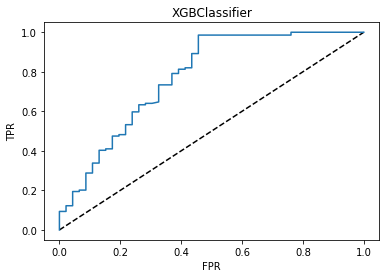

In [72]:
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label= 'XGBClassifier')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('XGBClassifier')
plt.show()

Observations: We can observe that A plot of the ROC Curve confirms the AUC interpretation of a best model for most probability thresholds.

In [73]:
print(roc_auc_score(y_test, GSV.best_estimator_.predict(x_test)))

0.764544885830466


In [74]:
#Saving the Model
import joblib

joblib.dump(GSV.best_estimator_, 'Loan_Application_Status_Prediction_best_XGB_model.obj')

['Loan_Application_Status_Prediction_best_XGB_model.obj']

Conclusion: For Analysis of Loan_Application_Status_Prediction we have selected XGBClassifier model which having accuracy of almost 88%.